<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Modelos de regresión

## Objetivos de la clase

* Aprender conceptos básicos de los modelos de regresión en python.

## Contenidos

* [Modelos de regresión](#c1)
* [Ejemplos con python](#c2)


## I.- Modelos de Regressión

Los modelos de regresión son ocupadas para predecir valores numéricos, por ejemplo, determinar el precio de una casa a partir de sus metros cuadrados.  Dentro de los modelos de regresión, el modelo más básico (y no por eso menos importante) es el **modelo de regresión lineal**.



### 1.1) Regresión lineal




El **modelo de regresión lineal** supone que, 
$$\boldsymbol{Y} =  \boldsymbol{X}\boldsymbol{\beta} + \boldsymbol{\epsilon},
$$ donde:

* $\boldsymbol{X} = (x_1,...,x_n)^{T}$: variable explicativa
* $\boldsymbol{Y} = (y_1,...,y_n)^{T}$: variable respuesta
* $\boldsymbol{\epsilon} = (\epsilon_1,...,\epsilon_n)^{T}$: error que se asume normal, es decir, $\epsilon \sim \mathcal{N}( \boldsymbol{0},\Sigma)$.
* $\boldsymbol{\beta} = (\beta_1,...,\beta_n)^{T}$: coeficientes de regresión.


La idea es tratar de establecer la relación entre las variables independientes y dependientes por medio de ajustar una mejor línea recta con respecto a los puntos.


<img src="https://files.realpython.com/media/fig-lin-reg.a506035b654a.png" width="560" height="480" align="center"/>

### 1.2) Error de un modelo

El **error** corresponde a la diferencia entre el valor original y el valor predicho,es decir:

$$e_{i}=y_{i}-\hat{y}_{i} $$

<img src="https://www.jmp.com/en_hk/statistics-knowledge-portal/what-is-multiple-regression/fitting-multiple-regression-model/_jcr_content/par/styledcontainer_2069/par/lightbox_4130/lightboxImage.img.png/1548704005203.png
" width="480" height="360" align="rigt"/>


### a) Formas de medir el error de un modelo

Para medir el ajuste de un modelo se ocupan las denominadas **funciones de distancias** o **métricas**. Existen varias métricas, dentro de las cuales encontramos:




1. **Métricas absolutas**: Las métricas absolutas o no escalada miden el error sin escalar los valores. Las métrica absolutas más ocupadas son:

    *  **Mean Absolute Error** (MAE)

    $$\textrm{MAE}(y,\hat{y}) = \dfrac{1}{n}\sum_{t=1}^{n}\left | y_{t}-\hat{y}_{t}\right |$$

    *  **Mean squared error** (MSE):

    $$\textrm{MSE}(y,\hat{y}) =\dfrac{1}{n}\sum_{t=1}^{n}\left ( y_{t}-\hat{y}_{t}\right )^2$$





2. **Métricas Porcentuales**: Las métricas porcentuales o escaladas miden el error de manera escalada, es decir, se busca acotar el error entre valores de 0 a 1, donde 0 significa que el ajuste es perfecto, mientras que 1 sería un mal ajuste. Cabe destacar que muchas veces las métricas porcentuales puden tener valores mayores a 1.Las métrica Porcentuales más ocupadas son:

    * **Mean absolute percentage error** (MAPE):
    
    $$\textrm{MAPE}(y,\hat{y}) = \dfrac{1}{n}\sum_{t=1}^{n}\left | \frac{y_{t}-\hat{y}_{t}}{y_{t}} \right |$$

    * **Symmetric mean absolute percentage error** (sMAPE):
    
    $$\textrm{sMAPE}(y,\hat{y}) = \dfrac{1}{n}\sum_{t=1}^{n} \frac{\left |y_{t}-\hat{y}_{t}\right |}{(\left | y_{t} \right |^2+\left | \hat{y}_{t} \right |^2)/2}$$

### b) R-cuadrado  Y  R-cuadrado ajustado



El **coeficiente de determinación** o **R-cuadrado** ($r^2$ ) , es un estadístico usado en el contexto de un modelo estadístico cuyo principal propósito es predecir futuros resultados o probar una hipótesis. El coeficiente determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo.

El valor del $r^2$ habitualmente entre 0 y 1, donde 0 significa una mala calidad de ajuste en el modelo y 1 corresponde a un ajuste lineal perfecto. A menudo, este estadístico es ocupado para modelos lineales.  

Se define por la fórmula:


$$r^2 = \dfrac{SS_{reg}}{SS_{tot}} = 1 - \dfrac{SS_{res}}{SS_{tot}},$$

donde:

* **$SS_{reg}$** ( suma explicada de cuadrados (ESS)): $\sum_{i}(\hat{y}-\bar{y})^2$


* **$SS_{res}$**: ( suma residual de cuadrados (RSS)): $\sum_{i}(y_{i}-\hat{y})^2 = \sum_{i}e_{i}^2$


* **$SS_{tot}$**: ( varianza): $\sum_{i}(y_{i}-\bar{y})$, donde: $SS_{tot}=SS_{reg}+SS_{res}$


En una forma general, se puede ver que $r^2$ está relacionado con la fracción de varianza inexplicada (FVU), ya que el segundo término compara la varianza inexplicada (varianza de los errores del modelo) con la varianza total (de los datos).



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Coefficient_of_Determination.svg/400px-Coefficient_of_Determination.svg.png
" width="480" height="360" align="rigt"/>


* Las áreas de los cuadrados azules representan los residuos cuadrados con respecto a la regresión lineal ($SS_{tot}$). 

* Las áreas de los cuadrados rojos representan los residuos al cuadrado con respecto al valor promedio ($SS_{res}$).



Por otro lado, a medida que más variables explicativas se agregan al modelo, el $r^2$ aumenta de forma automática, es decir, entre más variables explicativas se agreguen, mejor será la calidad será el ajuste (un falso argumento).



Es por ello que se define el **$r^2$ ajustado**, que viene a ser  una modificación del $r^2$, ajustando por el número de variables explicativas en un modelo ($p$) en relación con el número de puntos de datos ($n$).  


$$r^2_{ajustado} = 1-(1-r^2)\dfrac{n-1}{n-p-1} ,$$




### 1.3) Método de minimos cudrados

El **método de mínimos cudrados** es un método de optimización que busca encontrar la mejor aproximación mediante la minimización de los residuos al cuadrado, es decir, se buscar encontrar:

$$(P)\ \min \sum_{i=1}^n e_{i}^2 =\sum_{i=1}^n (y_{i}-f_{i}(x;\beta))^2   $$

Para el caso de la regresión lineal simple, se busca una función $$f(x;\beta) = \beta_{0} + \beta_{1}x,$$

por lo tanto el problema que se debe resolver es el siguiente:

$$(P)\ \min \sum_{i=1}^n e_{i}^2 =\dfrac{1}{n}\sum_{i=1}^{n}\left ( y_{i}-(\beta_{0} + \beta_{1}x_{i})\right )^2$$ 

Lo que significa, que para este problema, se debe encontrar $\beta = (\beta_{0},\beta_{1})$ que minimicen el problema de optimización. En este caso la solución viene dada por:

$$\hat{\beta}_{1} = \dfrac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^2} = \rho (x,y)\ ; \  \hat{\beta}_{0} = \bar{y}-\hat{\beta}_{1} \bar{x} $$

La metodología para encontrar los parámetros $\beta$ para el caso de la regresión lineal multiple se extienden de manera natural del modelo de regresión lineal multiple, cuya solución viene dada por:

$$\beta = (XX^{\top})^{-1}X^{\top}y$$

**IMPORTANTE**:


* Cabe destacar que el coeficiente $r^2$ funciona bien en el contexto del mundo de las regresiones lineales. Para el análisis de **modelos no lineales**, esto coeficiente pierde su interpretación.


* Se deja la siguiente [refrerencia](http://reliawiki.org/index.php/Simple_Linear_Regression_Analysis) para comprender conceptos claves de test de hipótesis, intervalos de confianza, p-valor. Estos términos son escenciales para comprender la significancia del ajuste realizado.


* Existen muchas más métricas, pero estas son las más usulaes de encontrar. En el archivo **metrics.py** se definen las distintas métricas presentadas, las cuales serpan de utilidad más adelante.

## II.- Ejemplos con python

### a) Dataset vehículos (regresion lineal simple)

El dataset `vehiculos_procesado.csv` contiene en detalle las componenetes de distintos vehículos. EL objetivo será predecir el **co2** mediante análisis de regresión lineal.

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes

# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# load data
litros_por_galon =  3.78541
vehiculos = pd.read_csv(os.path.join('data', 'vehiculos_procesado.csv'))
vehiculos["consumo_litros_milla"] = litros_por_galon/ vehiculos.consumo
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,consumo_std,desplazamiento_std,consumo_litros_milla
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,-0.653195,-0.613385,0.222671
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,-1.565710,0.676220,0.291185
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,-0.881324,-0.613385,0.236588
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,-1.565710,0.676220,0.291185
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,-0.881324,0.372783,0.236588


In [3]:
# descripcion del conjunto de datos
vehiculos.describe()

,year,desplazamiento,cilindros,consumo,co2,consumo_std,desplazamiento_std,consumo_litros_milla
count,35539.000000,35539.000000,35539.000000,35539.000000,35539.000000,3.553900e+04,3.553900e+04,35539.000000
mean,2000.893188,3.308585,5.727426,19.863277,470.607342,3.482225e-15,-1.983908e-14,0.200005
std,10.308730,1.318233,1.705600,4.383492,104.425820,1.000000e+00,1.000000e+00,0.044342
min,1984.000000,1.000000,2.000000,10.000000,169.000000,-2.250096e+00,-1.751272e+00,0.114709
25%,1991.000000,2.200000,4.000000,17.000000,396.000000,-6.531955e-01,-8.409628e-01,0.164583
50%,2002.000000,3.000000,6.000000,19.000000,465.000000,-1.969382e-01,-2.340898e-01,0.199232
75%,2010.000000,4.300000,6.000000,23.000000,525.000000,7.155764e-01,7.520787e-01,0.222671
max,2018.000000,8.400000,12.000000,33.000000,782.000000,2.996863e+00,3.862303e+00,0.378541


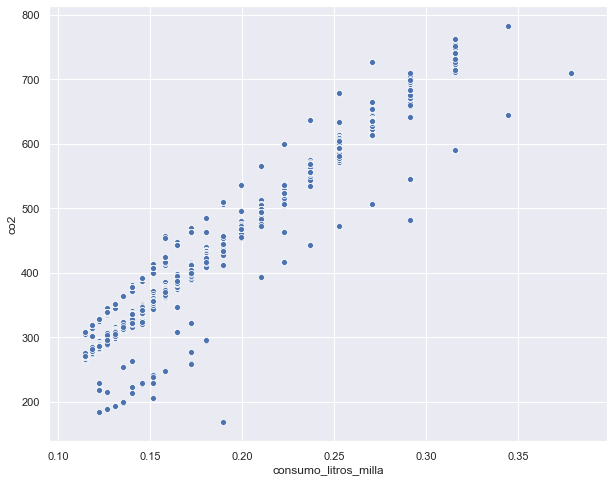

In [4]:
# grafico de puntos

sns.set(rc={'figure.figsize':(10,8)})

sns.scatterplot(
    x='consumo_litros_milla',
    y='co2',
    data=vehiculos,
)  
plt.show()

Para efectos prácticos, realicemos el ajuste para las variables:

* $Y$ = $co_{2}$
* $X$ = consumo_litros_millas

Es decir, el problema de regresión con varios regresores se simplifica a un problema de regresión de un solo regresor (también conocido como **regresión lineal simple**).

Lo primero que debemos hacer es separar nuestro datos en los conjuntos de **training set** y **test set**, pero ¿ qué son estos conjuntos ?

### Concepto de  Train set y Test set


Al momento de entrenar los modelos de machine leraning, se debe tener un conjunto para poder entrenar el modelo y otro conjunto para poder evaluar el modelo. Es por esto que el conjunto de datos se separá en dos conjuntos: 
    
 * **Train set**: Conjunto de entrenamiento con el cual se entrenarán los algoritmos de machine learning.
 
* **Test set**: Conjunto de testeo para averiguar la confiabilidad del modelo, es decir, cuan bueno es el ajuste del modelo.
    
<img src="https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2018/08/1-16.png" width="360" height="240" align="center"/>

### ¿ Qué tamaño debe tener cada conjunto?

La respuesta depende fuertemente del tamaño del conjunto de datos. Como regla empírica consideremos:

| número de filas      | train set | test set |
|----------------------|-----------|----------|
| entre 100-1000       | 67%       | 33%      |
| entre 1.000- 100.000 | 80%       | 20%      |
| mayor a 100.000      | 99%       | 1%       |

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with

X = vehiculos[['consumo_litros_milla']] # we only take the first two features.
y = vehiculos['co2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))
print(y_train)

Separando informacion:

numero de filas data original :  35539
numero de filas train set     :  28431
numero de filas test set      :  7108
12806    634.785714
25573    370.291667
8742     355.480000
26963    555.437500
29034    444.350000
            ...    
16850    296.233333
6265     634.785714
11284    522.764706
860      370.291667
15795    555.437500
Name: co2, Length: 28431, dtype: float64


Para eso debemos instanciar nuestro modelo de alguna librería. Para este ejemplo, la librería para trabajar los distintos modelos será **sklearn**, y el modelo de regresión lineal **LinearRegression**.

In [10]:
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

model_rl = LinearRegression() # Creando el modelo.

Una vez instanciado el modelo, debemos entrenarlo con los datos de **X_train** e **Y_train**. 

In [12]:
# ajustando el modelo
print(y_train.shape)
model_rl.fit(X_train, y_train) 

(28431,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Podemos ver los coeficientes del modelo ($\beta_0$ y $\beta_1$)

In [36]:
# Lista de coeficientes B para cada X

beta_0 = round(model_rl.intercept_,2)
beta_1 = round(model_rl.coef_[0],2)

print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
f(consumo_litros_milla) = {beta_0} + {beta_1}*consumo_litros_milla")

El mejor ajuste lineal viene dado por la recta: 

     f(consumo_litros_milla) = 2.59 + 2339.86*consumo_litros_milla


Una vez calculado los parámetros del modelo, se puede realizar las predicciones sobre el conjunto **X_test**, cuyo valor denominaremos $\hat{y} = f(X_{test}) $ y podemos comparar con el valor real **Y_test**. 

In [10]:
# predicciones
Y_predict = model_rl.predict(X_test)
Y_predict

array([494.6604334 , 593.07502158, 424.36429899, ..., 318.92009737,
       424.36429899, 468.76185756])

Además, podemos realizar un gráfico con las predicciones:

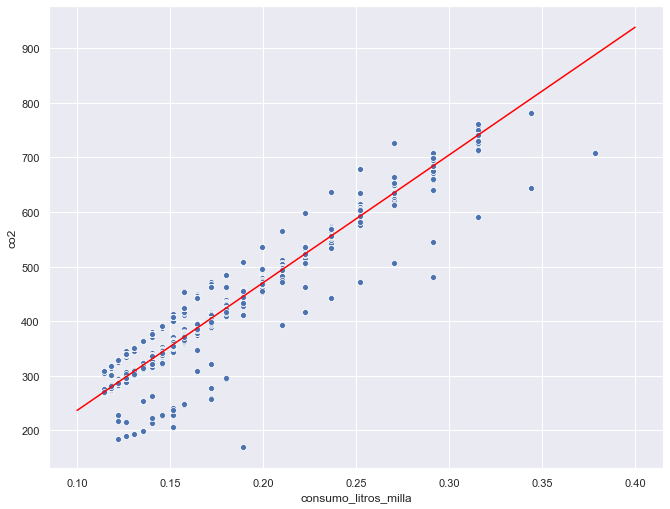

In [18]:
# graficos con seaborn
        
beta_0 = model_rl.intercept_
beta_1 = model_rl.coef_[0]
        
x_range = np.arange(0.1,0.5,0.1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df = pd.DataFrame({'x':X['consumo_litros_milla'],
                           'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.xlabel('consumo_litros_milla')
plt.ylabel('co2')
plt.show()

Gráficamente podemos decir que el modelo se ajusta bastante bien, puesto que la línea recta (nuestro ajuste) pasa por la mayor cantidad de puntos posibles. Por otro lado, existe valores numéricos que también nos pueden ayudar a convensernos de estos, que son las métricas que se habian definidos con anterioridad. 

Para ello, instanciaremos las distintas metricas del archivo **metrics_regression.py** y calcularemos sus distintos valores.

In [19]:
from metrics_regression import *
from sklearn.metrics import r2_score

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(r2_score(y_test, model_rl.predict(X_test)),4)
print('\nMetricas para el regresor consumo_litros_milla:\n')
print(df_metrics)


Metricas para el regresor consumo_litros_milla:

      mae       mse     rmse    mape   maape   wmape   mmape  smape      r2
0  3.4876  137.0854  11.7083  0.0079  0.0079  0.0074  0.0079  0.008  0.9875


Basado en las métricas y en la gráfica, podemos concluir que el ajuste realizado es bastante asertado. Veamos otro ejemplo donde el ajuste lineal puede ser limitado.

### Con Statsmodels

Ahora desarrollaremos el mismo código pero con `statsmodels`


In [40]:
import statsmodels.api as sm

model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 2.187e+06
Date:                Wed, 02 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:25:32   Log-Likelihood:            -1.1056e+05
No. Observations:               28431   AIC:                         2.211e+05
Df Residuals:                   28429   BIC:                         2.211e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.5875 

### b) Dataset  Boston house prices  (regresion lineal multiple)

En este ejemplo se va utilizar el dataset **Boston** que ya viene junto con **sklearn** y es ideal para practicar con Regresiones Lineales; el mismo contiene precios de casas de varias áreas de la ciudad de Boston. 



In [20]:
# cargar datos
boston = datasets.load_boston()

# dejar en formato dataframe
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df.head() # estructura de nuestro dataset.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Para efectos prácticos, realicemos el ajuste para las variables:

* $Y$ = TARGET (price)
* $X$ = CRIM ( per capita crime rate by town),

el proceso es similar al ejercicio, anterior, por lo que desplegamos simultaneamente todas las sentencias.

In [21]:
# datos para la regresion lineal simple
X = boston_df[['CRIM']]
Y = boston_df["TARGET"]

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) 

# ajustar el modelo
model_rl = LinearRegression() # Creando el modelo.
model_rl.fit(X_train, Y_train) # ajustando el modelo

# prediciones
Y_predict = model_rl.predict(X_test)

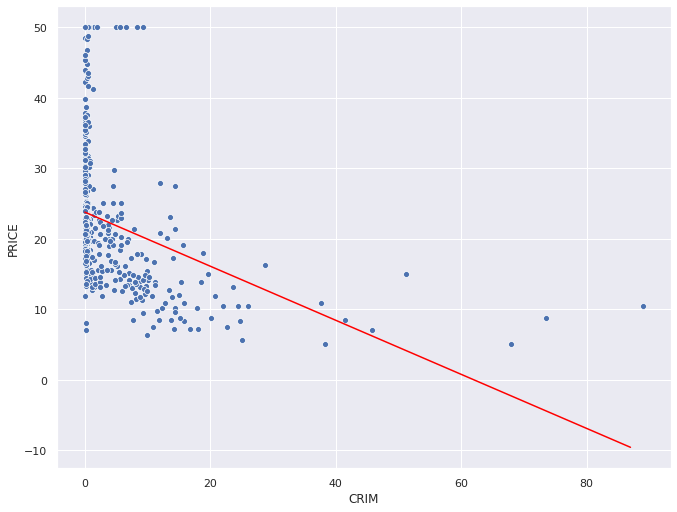

In [15]:
# graficar 
# graficos con seaborn
        
beta_0 = model_rl.intercept_
beta_1 = model_rl.coef_[0]
        
x_range = [n for n in range(int(X['CRIM'].min()),
                            int(X['CRIM'].max()),
                            1)
                  ]
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df = pd.DataFrame({'x':X['CRIM'],
                           'y_true':Y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.xlabel('CRIM')
plt.ylabel('PRICE')
plt.show()

In [16]:
# ejemplo: boston df
df_temp = pd.DataFrame(
    {
        'y':Y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(r2_score(Y_test, model_rl.predict(X_test)),4)

print('\nMetricas para el regresor CRIM:')
df_metrics


Metricas para el regresor CRIM:


,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,6.0851,64.6194,8.0386,0.2994,0.2725,0.2658,0.2805,0.2776,0.2276


Basado en las métricas y en la gráfica, el ajuste realizado no capta el comportamiento del modelo, esto puede suceder por:

* El fenómeno sigue un comprtamiento no lineal
* Faltan más regresores para explicar adecuadamente el fenómeno.

Realicemos el ajuste de regresión lineal, pero ahora considerando todos los regresores:

In [17]:
# datos 

X = boston.data 
Y = boston_df["TARGET"]

n,p = boston.data.shape

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) 

model_rl = LinearRegression() # Creando el modelo.
model_rl.fit(X_train, Y_train) # ajustando el modelo

# ejemplo: boston df
df_temp = pd.DataFrame(
    {
        'y':Y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df_metrics = summary_metrics(df_temp)

# calcular r2 y r2 ajustado

r2 = round(r2_score(Y_test, model_rl.predict(X_test)),4)

df_metrics['r2'] =  r2
df_metrics['r2_ajustado'] =  1-(1-r2)*(n-1)/(n-p-1)

print('\nMetricas para TODOS los regresores:')
df_metrics


Metricas para TODOS los regresores:


,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2,r2_ajustado
0,3.113,18.4954,4.3006,0.1604,0.1525,0.136,0.1507,0.1694,0.7789,0.773058


Cuando se aplica el modelo de regresión lineal con todas las variables regresoras, las métricas disminuyen considerablemente, lo implica una mejora en el modelo 

Un problema que se tiene, a diferencia de la regresión lineal simple,es que no se puede ver gráficamente la calidad del ajuste, por lo que solo se puede confiar en las métricas calculadas. Además, se dejan las siguientes preguntas:

* ¿ Entre más regresores, mejor será el modelo de regresión lineal?
* ¿ Qué se debe tener en cuenta antes de agregar otro variable regresora al modelo de regresión lineal ?
* ¿ Qué sucede si se tienen outliers ?

### c) Otros modelos lineales 


Existen varios modelos lineales que podemos trabajar en sklearn (ver [referencia](https://scikit-learn.org/stable/modules/linear_model.html)), los cualeas podemos utilizar e ir comparando unos con otros.

De lo modelos lineales, destacamos los siguientes:

* [regresión lineal clásica](https://en.wikipedia.org/wiki/Linear_regression): regresión clásica por mínimos cudrados.
$$(P)\ \min \sum_{i=1}^n (y_{i}-f_{i}(x;\beta))^2   $$
* [lasso](https://en.wikipedia.org/wiki/Lasso_(statistics)): se ocupa cuando tenemos un gran número de regresores y queremos que disminuya el problema de colinealidad (es decir, estimar como cero los parámetros poco relevantes).
$$(P)\ \min \sum_{i=1}^n (y_{i}-f_{i}(x;\beta))^2 + \lambda \sum_{i=1}^n |\beta_{i}| $$
* [ridge](https://en.wikipedia.org/wiki/Tikhonov_regularization): también sirve para disminuir el problema de colinealidad, y además trata de que los coeficientes sean más rocuesto bajo outliers.
$$(P)\ \min \sum_{i=1}^n (y_{i}-f_{i}(x;\beta))^2  + \lambda \sum_{i=1}^n \beta_{i}^2 $$


Dado que en sklearn, la forma de entrenar, estimar y predecir modelos de regresión siguen una misma estructura, para fectos prácticos, definimos una rutina para estimar las distintas métricas de la siguiente manera:

In [18]:
class SklearnRegressionModels:
    def __init__(self,model,name_model):

        self.model = model
        self.name_model = name_model
        
    @staticmethod
    def test_train_model(X,y,n_size):
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=n_size , random_state=42)
        return X_train, X_test, y_train, y_test
    
    def fit_model(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        return self.model.fit(X_train, y_train) 
    
    def df_testig(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        model_fit = self.model.fit(X_train, y_train)
        preds = model_fit.predict(X_test)
        df_temp = pd.DataFrame(
            {
                'y':y_test,
                'yhat': model_fit.predict(X_test)
            }
        )
        
        return df_temp
    
    def metrics(self,X,y,test_size):
        df_temp = self.df_testig(X,y,test_size)
        df_metrics = summary_metrics(df_temp)
        df_metrics['model'] = self.name_model
        
        return df_metrics

    def parameters(self,X,y,test_size):
        model_fit = self.fit_model(X,y,test_size)
        list_betas = [
            ('beta_0',model_fit.intercept_)
                ]
        betas = model_fit.coef_

        for num, beta in enumerate(betas):
            name_beta = f'beta_{num+1}'
            list_betas.append((name_beta,round(beta,2)))

        result = pd.DataFrame(
            columns = ['coef','value'],
            data = list_betas
        )
        
        result['model'] = self.name_model
        return result 

Ahora, comparemos las métricas de los distintos modelos aplicado al conjunto de datos **boston dataset**.

In [19]:
from sklearn import linear_model

# boston dataframe

X = boston.data 
Y = boston_df["TARGET"]

reg_lineal = linear_model.LinearRegression()
reg_ridge = linear_model.Ridge(alpha=.5)
reg_lasso = linear_model.Lasso(alpha=0.1)

list_models =[
    [reg_lineal,'lineal'],
    [reg_ridge,'ridge'],
    [reg_lasso,'lasso'],
]

frames_metrics = []
frames_coef = []

for model,name_models in list_models:
    fit_model =  SklearnRegressionModels( model,name_models)
    frames_metrics.append(fit_model.metrics(X,Y,0.2))
    frames_coef.append(fit_model.parameters(X,Y,0.2))

In [20]:
# juntar resultados: metricas
pd.concat(frames_metrics)

,mae,mse,rmse,mape,maape,wmape,mmape,smape,model
0,3.1891,24.2911,4.9286,0.1687,0.1538,0.1484,0.1579,0.1790,lineal
0,3.1493,24.3776,4.9374,0.1668,0.1516,0.1466,0.1562,0.1769,ridge
0,3.1452,25.1556,5.0155,0.1675,0.1512,0.1464,0.1569,0.1765,lasso


In [21]:
# juntar resultados: coeficientes
pd.concat(frames_coef)

,coef,value,model
0,beta_0,30.246751,lineal
1,beta_1,-0.110000,lineal
2,beta_2,0.030000,lineal
3,beta_3,0.040000,lineal
4,beta_4,2.780000,lineal
5,beta_5,-17.200000,lineal
6,beta_6,4.440000,lineal
7,beta_7,-0.010000,lineal
8,beta_8,-1.450000,lineal
9,beta_9,0.260000,lineal


## Referencia

1. [Supervised learning](https://scikit-learn.org/stable/supervised_learning.html)